Loading Libraries and dataset

In [105]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.stats import boxcox, zscore, mannwhitneyu
from scipy.cluster.vq import kmeans, vq
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster import hierarchy

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


'''
Above libaries are used for following purposes:
1. pandas - For data manipulation and analysis
2. numpy - For numerical computations and data transformations.
3. seaborn - For data visualization
4. matplotlib - For data visualization
5. sklearn - For data preprocessing like Categorical feature encoding, Feature Scaling,
        data spliting for training and testing dataset; and performing clustering and PCA
6. scipy - For data preprocessing like Feature transformation, applying statistaical testing, Hierachical and 
K-means clustering.
'''

'\nAbove libaries are used for following purposes:\n1. pandas - For data manipulation and analysis\n2. numpy - For numerical computations and data transformations.\n3. seaborn - For data visualization\n4. matplotlib - For data visualization\n5. sklearn - For data preprocessing like Categorical feature encoding, Feature Scaling,\n        data spliting for training and testing dataset; and performing clustering and PCA\n6. scipy - For data preprocessing like Feature transformation, applying statistaical testing, Hierachical and K-means clustering.\n'

In [2]:
#Loading dataframe
file_path = ('MS4S16_Dataset.csv')
becteria_data = pd.read_csv(file_path)
becteria_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Exploratory Data Analysis

In [3]:
becteria_data.shape

(571, 32)

In [4]:
becteria_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    float64
 1   diagnosis                568 non-null    object 
 2   radius_mean              566 non-null    float64
 3   texture_mean             565 non-null    float64
 4   perimeter_mean           567 non-null    float64
 5   area_mean                566 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         567 non-null    float64
 8   concavity_mean           567 non-null    float64
 9   concave points_mean      563 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   567 non-null    float64
 12  radius_se                565 non-null    float64
 13  texture_se               563 non-null    float64
 14  perimeter_se             5

In [5]:
becteria_data.describe(include='all').round(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.680000e+02,568,566.0000,565.0000,567.000,566.0000,568.0000,567.0000,567.0000,563.0000,...,558.0000,550.0000,565.0000,567.0000,562.0000,567.0000,568.0000,565.0000,567.0000,558.0000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.011402e+07,NaN,14.1033,-241.9737,91.949,654.9424,0.0963,0.1043,0.0887,-3.5004,...,16.2698,25.7357,110.9480,897.9365,0.1325,0.2544,0.2721,0.1145,0.2903,0.0840
std,1.250894e+08,NaN,3.5174,445.2169,24.358,352.5559,0.0142,0.0529,0.0797,59.4923,...,4.8424,6.1238,59.2457,688.2311,0.0229,0.1576,0.2089,0.0659,0.0619,0.0182
min,8.670000e+03,NaN,6.9810,-999.0000,43.790,143.5000,0.0526,0.0194,0.0000,-999.0000,...,7.9300,12.0200,50.4100,185.2000,0.0712,0.0273,0.0000,0.0000,0.1565,0.0550
25%,8.690778e+05,NaN,11.6925,-999.0000,75.190,420.3000,0.0863,0.0647,0.0295,0.0199,...,13.0150,21.2225,84.1600,515.5500,0.1168,0.1474,0.1145,0.0649,0.2504,0.0713
50%,9.060010e+05,NaN,13.3200,17.0000,86.240,548.7500,0.0959,0.0926,0.0615,0.0333,...,14.9650,25.4550,97.8200,686.6000,0.1314,0.2141,0.2274,0.0999,0.2826,0.0800
75%,8.812852e+06,NaN,15.7800,21.0100,104.200,787.0500,0.1053,0.1304,0.1300,0.0735,...,18.7825,29.7050,126.9000,1091.5000,0.1460,0.3395,0.3835,0.1613,0.3186,0.0921


In [6]:
#creating an index of numerical features for preprocessing purpose
numerical_features = becteria_data.iloc[:,2:].columns

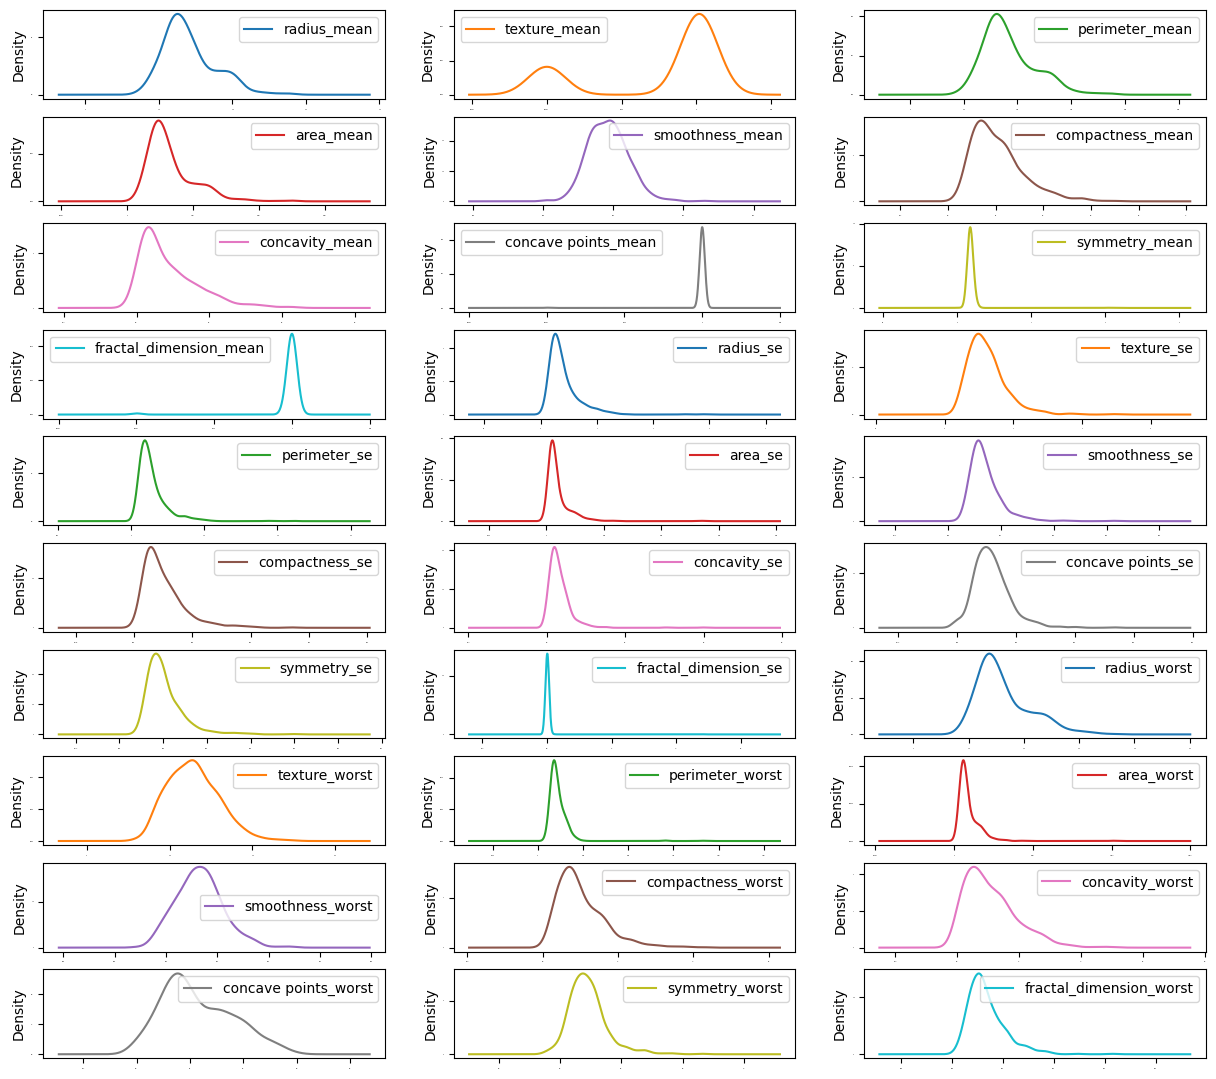

In [7]:
#Visualizing the distribution of numerical features
becteria_data[numerical_features].plot(kind='density',subplots=True, layout=(11,3), sharex= False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

In [8]:
#Checking the skewness of numerical features
skewness = becteria_data[numerical_features].skew()
skewness

radius_mean                 0.928544
texture_mean               -1.117061
perimeter_mean              0.976911
area_mean                   1.640323
smoothness_mean             0.406965
compactness_mean            1.187826
concavity_mean              1.401736
concave points_mean       -16.733030
symmetry_mean              15.293945
fractal_dimension_mean     -8.261369
radius_se                   3.079601
texture_se                  1.639585
perimeter_se                3.429533
area_se                     5.401403
smoothness_se               2.346716
compactness_se              1.921233
concavity_se                5.088332
concave points_se           1.427169
symmetry_se                 2.177724
fractal_dimension_se       23.598161
radius_worst                1.102015
texture_worst               0.514889
perimeter_worst             8.009210
area_worst                  5.181586
smoothness_worst            0.409217
compactness_worst           1.468269
concavity_worst             1.147034
c

In [9]:
# Create and store the correlation matrix of the numerical features
# Results are rounded to 5 decimal places for better readability

df_correlation = becteria_data[numerical_features].corr().round(5)
df_correlation

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.00000,-0.03819,0.99786,0.98715,0.17466,0.50313,0.67186,0.00494,0.17593,0.01498,...,0.97057,0.27791,0.50971,0.75947,0.12212,0.41398,0.52284,0.74360,0.16529,0.00531
texture_mean,-0.03819,1.00000,-0.03207,-0.03351,0.00533,0.01235,0.01549,0.03309,-0.01507,0.10048,...,-0.00445,0.05680,0.03077,0.00314,0.05441,0.04213,0.02503,0.00404,0.08721,0.06731
perimeter_mean,0.99786,-0.03207,1.00000,0.98636,0.21232,0.55631,0.71485,0.00587,0.19000,0.00976,...,0.96968,0.28998,0.58158,0.76036,0.15173,0.45576,0.56383,0.77211,0.18795,0.04796
area_mean,0.98715,-0.03351,0.98636,1.00000,0.18013,0.49816,0.68517,0.01117,0.18902,0.01880,...,0.96309,0.27418,0.50796,0.77653,0.12435,0.39047,0.51277,0.72337,0.14445,0.00091
smoothness_mean,0.17466,0.00533,0.21232,0.18013,1.00000,0.65879,0.52314,0.01693,0.17610,-0.08378,...,0.21232,0.05002,0.10114,0.17759,0.80430,0.47343,0.43684,0.50457,0.39196,0.50066
compactness_mean,0.50313,0.01235,0.55631,0.49816,0.65879,1.00000,0.88337,0.01015,0.26771,-0.09349,...,0.53067,0.24753,0.28825,0.40909,0.56473,0.86590,0.81654,0.81557,0.51256,0.68893
concavity_mean,0.67186,0.01549,0.71485,0.68517,0.52314,0.88337,1.00000,0.02667,0.25502,-0.03392,...,0.68326,0.28943,0.36669,0.54255,0.44975,0.75554,0.88503,0.86231,0.40981,0.51713
concave points_mean,0.00494,0.03309,0.00587,0.01117,0.01693,0.01015,0.02667,1.00000,0.00741,-0.00720,...,0.00917,0.04387,0.01048,0.01347,0.03803,0.02667,0.02447,0.01309,-0.02536,0.01502
symmetry_mean,0.17593,-0.01507,0.19000,0.18902,0.17610,0.26771,0.25502,0.00741,1.00000,-0.01138,...,0.17288,0.04555,0.09349,0.14523,0.11521,0.17420,0.18590,0.22335,0.17990,0.14890
fractal_dimension_mean,0.01498,0.10048,0.00976,0.01880,-0.08378,-0.09349,-0.03392,-0.00720,-0.01138,1.00000,...,0.01852,-0.04249,0.01111,0.02235,-0.02595,-0.07240,-0.03570,-0.02701,-0.01746,-0.05883


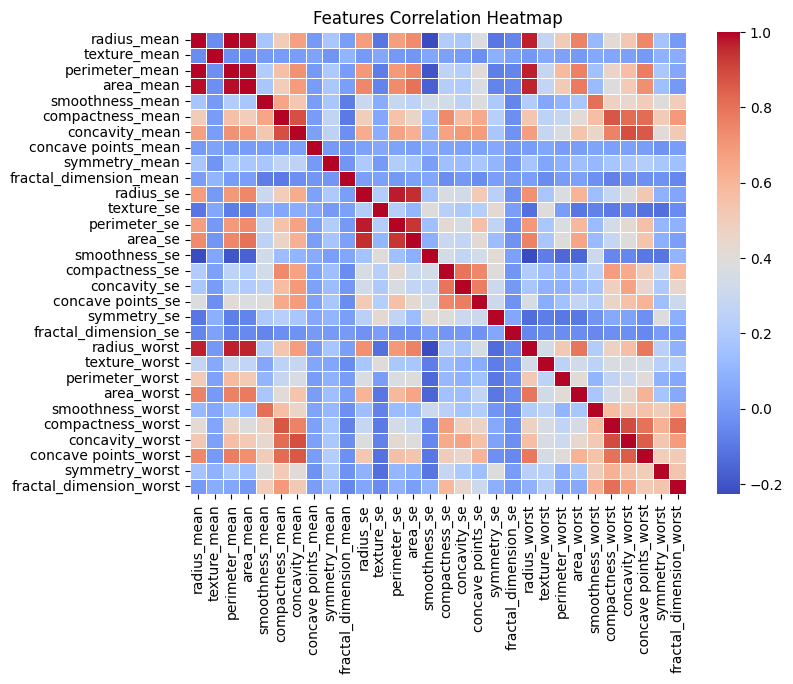

In [10]:
# Create a heatmap of the correlation matrix for better understanding of the relationships between the features
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlation, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Features Correlation Heatmap')
plt.show()

In [11]:
'''
The initial investigation of the dataset shows that there are 32 features, and 571 observations, three of which are missing. 
The features are a mix of numerical and categorical data.
The type of numerical features are float64, and the categorical feature is object. Therefore, there is no need to convert the data types.
The feature 'diagnosis' is the target variable, and the rest of the features are the predictors.
The target variable 'diagnosis' has two categories, 'M' and 'B'.
The numerical features are on different scales, they need to be standardized before applying any machine learning algorithm.
The dataset also contains missing values, which can be seen from .info results.
         For example, the feature 'diagnosis' has 3 missing values. (568 values out of 571)
Some of the numerical features have -999.0 values, which are considered as to be missing values. So, these should be treated as nan values.
For imputing nan values, median value of the respective numerical feature are used because the data is not normally distributed.

The distribution of the numerical data is not normally distributed as shown by the density plots and the skewness values.
        Therefore, the transformation should be applied to the numerical features to make them normally distributed.

Some of the numerical features are highly correlated with each other. for example, 'radius_mean' and 'texture_mean' have a correlation of 0.9978.
        Highly correlated features should be removed from the dataset to avoid multicollinearity.

Statistical analysis should be performed after dealing with missing values , duplicate values and outliers.
'''

"\nThe initial investigation of the dataset shows that there are 32 features, and 571 observations, three of which are missing. \nThe features are a mix of numerical and categorical data.\nThe type of numerical features are float64, and the categorical feature is object. Therefore, there is no need to convert the data types.\nThe feature 'diagnosis' is the target variable, and the rest of the features are the predictors.\nThe target variable 'diagnosis' has two categories, 'M' and 'B'.\nThe numerical features are on different scales, they need to be standardized before applying any machine learning algorithm.\nThe dataset also contains missing values, which can be seen from .info results.\n         For example, the feature 'diagnosis' has 3 missing values. (568 values out of 571)\nSome of the numerical features have -999.0 values, which are considered as to be missing values. So, these should be treated as nan values.\nFor imputing nan values, median value of the respective numerical f

Dealing with Missing Values

In [12]:
# Calculate missing values of all columns
becteria_data.isna().sum()

id                          3
diagnosis                   3
radius_mean                 5
texture_mean                6
perimeter_mean              4
area_mean                   5
smoothness_mean             3
compactness_mean            4
concavity_mean              4
concave points_mean         8
symmetry_mean               3
fractal_dimension_mean      4
radius_se                   6
texture_se                  8
perimeter_se                3
area_se                     6
smoothness_se               6
compactness_se              7
concavity_se                8
concave points_se           9
symmetry_se                 8
fractal_dimension_se        7
radius_worst               13
texture_worst              21
perimeter_worst             6
area_worst                  4
smoothness_worst            9
compactness_worst           4
concavity_worst             3
concave points_worst        6
symmetry_worst              4
fractal_dimension_worst    13
dtype: int64

In [13]:
# Since the target variable has only 3 missing values, it is better to drop them permanently using inplace.
becteria_data.dropna(subset='diagnosis', inplace=True)
becteria_data.shape

(568, 32)

In [14]:
'''
After dropping the missing values, the dataset has 568 observations and 32 features.
'''

'\nAfter dropping the missing values, the dataset has 568 observations and 32 features.\n'

In [15]:
#Recheck remaining missing value in the dataset
becteria_data.isna().sum()[becteria_data.isna().sum() > 0]

radius_mean                 2
texture_mean                3
perimeter_mean              1
area_mean                   2
compactness_mean            1
concavity_mean              1
concave points_mean         5
fractal_dimension_mean      1
radius_se                   3
texture_se                  5
area_se                     3
smoothness_se               3
compactness_se              4
concavity_se                5
concave points_se           6
symmetry_se                 5
fractal_dimension_se        4
radius_worst               10
texture_worst              18
perimeter_worst             3
area_worst                  1
smoothness_worst            6
compactness_worst           1
concave points_worst        3
symmetry_worst              1
fractal_dimension_worst    10
dtype: int64

In [16]:
#Convert -999.0 to Nan value permanently using inplace.
becteria_data.replace(-999.0, np.nan, inplace=True)

In [17]:
# Compute and view median for each numerical feature to impute missing values in dataset.
median_values = becteria_data[numerical_features].median()
median_values

radius_mean                 13.320000
texture_mean                18.925000
perimeter_mean              86.240000
area_mean                  548.750000
smoothness_mean              0.095895
compactness_mean             0.092630
concavity_mean               0.061540
concave points_mean          0.033410
symmetry_mean                0.179200
fractal_dimension_mean       0.061540
radius_se                    0.324200
texture_se                   1.130000
perimeter_se                 2.285500
area_se                     24.440000
smoothness_se                0.006369
compactness_se               0.020435
concavity_se                 0.025860
concave points_se            0.010920
symmetry_se                  0.018750
fractal_dimension_se         0.003217
radius_worst                14.965000
texture_worst               25.455000
perimeter_worst             97.820000
area_worst                 686.600000
smoothness_worst             0.131350
compactness_worst            0.214100
concavity_wo

In [18]:
# Permanetly NA values with median values using inplace
becteria_data.fillna(median_values, inplace=True)

Dealing with Duplicate Values

In [19]:
#Search for duplicate values
becteria_data[becteria_data.duplicated(keep=False)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
492,914062.0,M,18.01,18.925,118.40,1007.0,0.10010,0.12890,0.117,0.07762,...,21.530,26.06,143.40,1426.0,0.13090,0.23270,0.2544,0.1489,0.3251,0.07625
493,914062.0,M,18.01,18.925,118.40,1007.0,0.10010,0.12890,0.117,0.07762,...,21.530,26.06,143.40,1426.0,0.13090,0.23270,0.2544,0.1489,0.3251,0.07625
569,92751.0,B,7.76,24.540,47.92,181.0,0.05263,0.04362,0.000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039
570,92751.0,B,7.76,24.540,47.92,181.0,0.05263,0.04362,0.000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [20]:
#Remove one instance of duplicate values permanently using inplace
becteria_data.drop_duplicates(inplace=True)
becteria_data.shape

(566, 32)

Dealing with Outliers

In [21]:
#Calculate the z-scores of all instances of numerical features to identify outliers
# Threshold is set to 3, which means that any instance 3 standard deviations away from the mean is considered an outlier, appoximately 99% of the data.
threshold = 3
z_scores = zscore(becteria_data[numerical_features])
z_scores

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.109851,-2.285063,1.270641,0.985180,1.564868,3.280195,2.653187,2.554576,0.473424,2.317027,...,1.904903,-1.391477,1.246977,1.631107,1.307214,2.610694,2.104395,2.301384,2.744238,1.937334
1,1.846858,-0.381961,1.686906,1.909984,-0.827463,-0.487350,-0.023485,0.561532,-0.053950,-0.881102,...,1.823537,-0.382872,0.810376,1.539460,-0.384889,-0.432787,-0.148690,1.090171,-0.246519,0.279349
2,1.595476,0.514222,1.567385,1.559981,0.939422,1.051405,1.363815,2.057157,0.169337,-0.399351,...,1.527282,-0.031188,0.703764,1.180146,0.522854,1.078787,0.851616,1.959682,1.147875,0.199446
3,-0.766945,0.290176,-0.593077,-0.764550,3.277737,3.399493,1.916224,1.469063,0.628074,5.034856,...,-0.279457,0.129725,-0.203791,-0.480116,3.404716,3.885906,1.984626,2.180873,6.035524,4.939241
4,1.766873,-1.265268,1.777578,1.827463,0.278439,0.538234,1.371347,1.445747,-0.056556,-0.567673,...,1.312392,-1.500964,0.698687,0.985215,0.214397,-0.315877,0.610163,0.731688,-0.870199,-0.399825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,2.129663,0.807799,2.061958,2.345353,1.038925,0.218212,1.947610,2.342137,-0.128668,-0.944948,...,1.919507,0.113136,0.933910,1.642744,0.373032,-0.275848,0.661424,1.633234,-1.361388,-0.712223
566,1.721167,2.316890,1.616842,1.725023,0.100756,-0.018490,0.693391,1.280199,-0.106079,-1.075543,...,1.552317,2.078920,0.746070,1.212150,-0.702158,-0.397206,0.234090,0.736265,-0.534123,-0.977456
567,0.712782,2.273110,0.673031,0.578550,-0.840967,-0.039320,0.046947,0.117223,-0.246828,-0.908672,...,0.569668,1.393798,0.267162,0.329140,-0.821134,0.347462,0.324156,0.415918,-1.106099,-0.321032
568,1.855428,2.595015,1.983650,1.736405,1.522224,3.268833,3.297246,2.681522,0.454310,-0.174437,...,1.980010,2.273010,1.246977,1.343074,1.430596,3.897343,3.190934,2.295283,1.913741,2.220323


In [22]:
# Remove outliers from the dataset and view database shape after the removal of outliers.
outliers = (abs(z_scores) > threshold).any(axis=1)
becteria_data = becteria_data[~outliers]
becteria_data.shape

(490, 32)

In [23]:
'''
Summary of above data preprocessing steps:
1. The missing values in the target variable 'diagnosis' were dropped.
2. The missing values in the numerical features were imputed with the median values because the data is not normally distributed.
3. The -999.0 values in the numerical features were replaced with NaN values and then median value of the respective numerical feature.
4. The duplicate values were removed from the dataset.
5. The outliers were removed from the dataset. using z-score method with the threshold of 3.
'''

"\nSummary of above data preprocessing steps:\n1. The missing values in the target variable 'diagnosis' were dropped.\n2. The missing values in the numerical features were imputed with the median values because the data is not normally distributed.\n3. The -999.0 values in the numerical features were replaced with NaN values and then median value of the respective numerical feature.\n4. The duplicate values were removed from the dataset.\n5. The outliers were removed from the dataset. using z-score method with the threshold of 3.\n"

Feature Encoding

In [24]:
# Applying OneHotEncoder to the target variable 'diagnosis'.
category_column = becteria_data.loc[:,['diagnosis']]
one_hot_encoder = OneHotEncoder()
category_one_hot = one_hot_encoder.fit_transform(category_column)

category_one_hot.toarray()

becteria_data['diagnosis'] = category_one_hot.toarray()

In [25]:
'''
The One Hot Encoder was applied to the target variable 'diagnosis' to convert it into a binary format because of the following reasons:
1. The target variable 'diagnosis' is categorical.
2. The machine learning algorithms require the target variable to be in a binary format.
3. The One Hot Encoder maintains independence between the categories of the target variable.
4. It is easier to interpret the results of the machine learning algorithms when the target variable is in a binary format.

As a result, the target variable 'diagnosis' was converted into a binary format in the dataset.
'''

"\nThe One Hot Encoder was applied to the target variable 'diagnosis' to convert it into a binary format because of the following reasons:\n1. The target variable 'diagnosis' is categorical.\n2. The machine learning algorithms require the target variable to be in a binary format.\n3. The One Hot Encoder maintains independence between the categories of the target variable.\n4. It is easier to interpret the results of the machine learning algorithms when the target variable is in a binary format.\n\nAs a result, the target variable 'diagnosis' was converted into a binary format in the dataset.\n"

Feature Engineering

In [26]:
# Viewing correlation matrix of the numerical features after Imputing reqiured values and Hot encoding of target variable
df_correlation

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.00000,-0.03819,0.99786,0.98715,0.17466,0.50313,0.67186,0.00494,0.17593,0.01498,...,0.97057,0.27791,0.50971,0.75947,0.12212,0.41398,0.52284,0.74360,0.16529,0.00531
texture_mean,-0.03819,1.00000,-0.03207,-0.03351,0.00533,0.01235,0.01549,0.03309,-0.01507,0.10048,...,-0.00445,0.05680,0.03077,0.00314,0.05441,0.04213,0.02503,0.00404,0.08721,0.06731
perimeter_mean,0.99786,-0.03207,1.00000,0.98636,0.21232,0.55631,0.71485,0.00587,0.19000,0.00976,...,0.96968,0.28998,0.58158,0.76036,0.15173,0.45576,0.56383,0.77211,0.18795,0.04796
area_mean,0.98715,-0.03351,0.98636,1.00000,0.18013,0.49816,0.68517,0.01117,0.18902,0.01880,...,0.96309,0.27418,0.50796,0.77653,0.12435,0.39047,0.51277,0.72337,0.14445,0.00091
smoothness_mean,0.17466,0.00533,0.21232,0.18013,1.00000,0.65879,0.52314,0.01693,0.17610,-0.08378,...,0.21232,0.05002,0.10114,0.17759,0.80430,0.47343,0.43684,0.50457,0.39196,0.50066
compactness_mean,0.50313,0.01235,0.55631,0.49816,0.65879,1.00000,0.88337,0.01015,0.26771,-0.09349,...,0.53067,0.24753,0.28825,0.40909,0.56473,0.86590,0.81654,0.81557,0.51256,0.68893
concavity_mean,0.67186,0.01549,0.71485,0.68517,0.52314,0.88337,1.00000,0.02667,0.25502,-0.03392,...,0.68326,0.28943,0.36669,0.54255,0.44975,0.75554,0.88503,0.86231,0.40981,0.51713
concave points_mean,0.00494,0.03309,0.00587,0.01117,0.01693,0.01015,0.02667,1.00000,0.00741,-0.00720,...,0.00917,0.04387,0.01048,0.01347,0.03803,0.02667,0.02447,0.01309,-0.02536,0.01502
symmetry_mean,0.17593,-0.01507,0.19000,0.18902,0.17610,0.26771,0.25502,0.00741,1.00000,-0.01138,...,0.17288,0.04555,0.09349,0.14523,0.11521,0.17420,0.18590,0.22335,0.17990,0.14890
fractal_dimension_mean,0.01498,0.10048,0.00976,0.01880,-0.08378,-0.09349,-0.03392,-0.00720,-0.01138,1.00000,...,0.01852,-0.04249,0.01111,0.02235,-0.02595,-0.07240,-0.03570,-0.02701,-0.01746,-0.05883


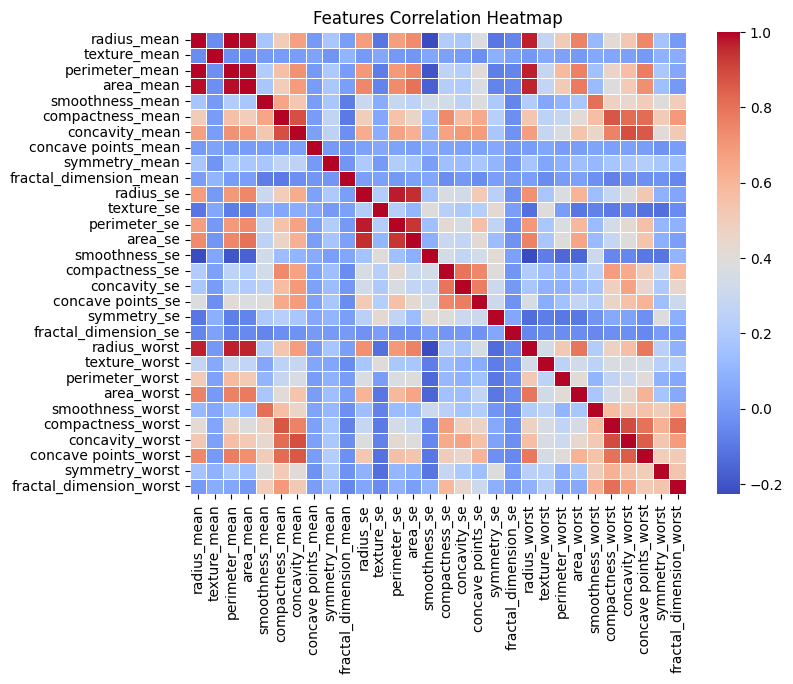

In [27]:
# Visualising heatmap of correlation matrix of the numerical features.
plt.figure(figsize=(8, 6))
sns.heatmap(df_correlation, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Features Correlation Heatmap')
plt.show()

In [28]:
# Calculate the combination of highly correlated features with a correlation coefficient above 0.80
df = becteria_data.iloc[:,2:]

# Create an empty DataFrame to store correlation combinations above 0.80
corr_df = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Correlation'])

# Iterate through columns and calculate correlation coefficients
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        col1 = df.columns[i]
        col2 = df.columns[j]
        correlation = df[col1].corr(df[col2])
        if abs(correlation) > 0.80:  # Check if correlation is above 0.80
            corr_df = pd.concat([corr_df, pd.DataFrame({'Variable 1': [col1], 'Variable 2': [col2],
                                                         'Correlation': [correlation]})], ignore_index=True)
print(corr_df)

             Variable 1            Variable 2  Correlation
0           radius_mean        perimeter_mean     0.998343
1           radius_mean             area_mean     0.991683
2           radius_mean   concave points_mean     0.806810
3           radius_mean          radius_worst     0.960357
4           radius_mean       perimeter_worst     0.966684
5           radius_mean            area_worst     0.951542
6        perimeter_mean             area_mean     0.990410
7        perimeter_mean   concave points_mean     0.831458
8        perimeter_mean          radius_worst     0.961917
9        perimeter_mean       perimeter_worst     0.972526
10       perimeter_mean            area_worst     0.953693
11            area_mean   concave points_mean     0.810441
12            area_mean               area_se     0.815404
13            area_mean          radius_worst     0.961240
14            area_mean       perimeter_worst     0.966520
15            area_mean            area_worst     0.9674

/var/folders/ht/ptxmbzwn0px6gzhsyfc1qpww0000gn/T/ipykernel_3273/1149225664.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_df = pd.concat([corr_df, pd.DataFrame({'Variable 1': [col1], 'Variable 2': [col2],


In [36]:
# Removing highly correlated features from the dataset
#Also removing 'ID' column as it is not required for further analysis
columns_to_drop = ['id','perimeter_mean', 'area_mean', 'radius_worst','perimeter_se', 'area_se','perimeter_worst', 'area_worst',
                   'compactness_worst', 'concavity_worst', 'concave points_worst', 'concavity_se','concave points_mean']

In [37]:
# Permanently removing highly correlated features from the dataset using inplace
# Store into a new variable and view the shape of the dataset after removing highly correlated features
filtered_df = becteria_data.drop(columns=columns_to_drop)
filtered_df.shape

(490, 19)

In [38]:
# View and store the correlation matrix of the filtered dataset.
df_correlation_filtered = filtered_df.iloc[:,1:].corr()
df_correlation_filtered

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.261021,0.096654,0.515270,0.716405,0.116307,-0.382919,0.649281,-0.130318,-0.305874,0.227855,0.437362,-0.213487,0.030994,0.266568,0.085066,0.178885,0.037631
texture_mean,0.261021,1.000000,-0.028689,0.207590,0.259641,0.047804,-0.065222,0.242835,0.344557,0.019149,0.187311,0.162521,0.012671,0.036147,0.780561,0.073329,0.110270,0.094460
smoothness_mean,0.096654,-0.028689,1.000000,0.631674,0.461262,0.507417,0.583113,0.281464,0.102311,0.355744,0.237413,0.373738,0.126569,0.183947,0.024561,0.784825,0.345826,0.457177
compactness_mean,0.515270,0.207590,0.631674,1.000000,0.865777,0.500164,0.464683,0.510309,-0.009261,0.080995,0.720272,0.649437,0.047817,0.335259,0.224474,0.553529,0.463061,0.670021
concavity_mean,0.716405,0.259641,0.461262,0.865777,1.000000,0.387626,0.185664,0.636185,0.007087,0.009534,0.620948,0.659043,-0.030819,0.264708,0.304458,0.444963,0.368511,0.491580
symmetry_mean,0.116307,0.047804,0.507417,0.500164,0.387626,1.000000,0.366402,0.301240,0.112843,0.198891,0.309102,0.311685,0.350198,0.179465,0.052804,0.366900,0.630115,0.328030
fractal_dimension_mean,-0.382919,-0.065222,0.583113,0.464683,0.185664,0.366402,1.000000,-0.048622,0.116004,0.434339,0.429938,0.191849,0.244912,0.365278,-0.059659,0.511612,0.257961,0.725972
radius_se,0.649281,0.242835,0.281464,0.510309,0.636185,0.301240,-0.048622,1.000000,0.239469,0.146708,0.372844,0.587828,0.147710,0.165129,0.209237,0.159589,0.090696,0.088097
texture_se,-0.130318,0.344557,0.102311,-0.009261,0.007087,0.112843,0.116004,0.239469,1.000000,0.432772,0.187724,0.245664,0.365459,0.086357,0.446338,-0.035438,-0.173972,-0.104322
smoothness_se,-0.305874,0.019149,0.355744,0.080995,0.009534,0.198891,0.434339,0.146708,0.432772,1.000000,0.241310,0.297342,0.445058,0.233506,-0.049573,0.386937,-0.114610,0.101276


In [39]:
# compactness_se and concavity_se are highly correlated, the score is 0.860490
# Compactness_mean and concavity_mean are highly correlated, the score is 0.865777
# Considering to remove one of them.

# Consider to use dendrogram to visualize the correlation matrix of the filtered dataset.

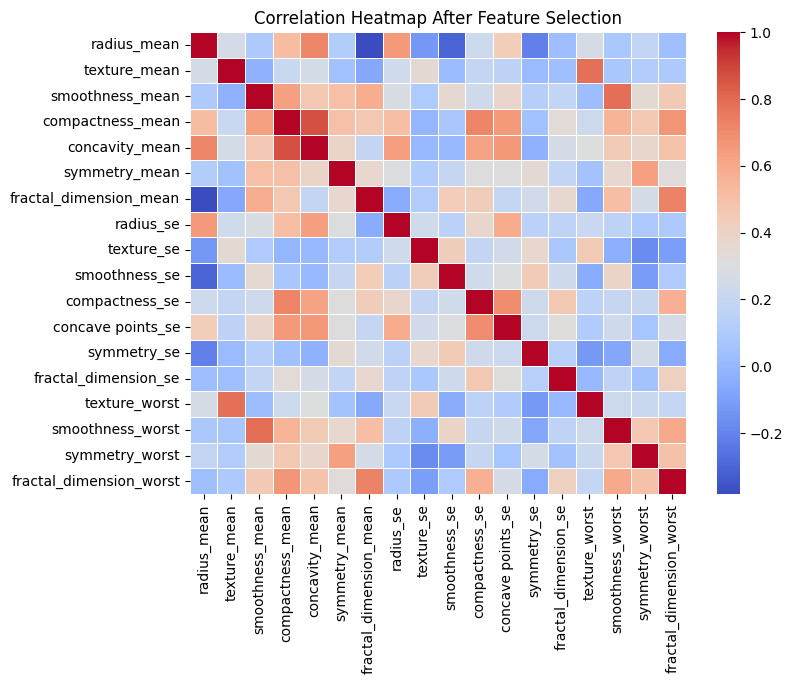

In [40]:
# Visualising heatmap of correlation matrix of the filtered dataset.

plt.figure(figsize=(8, 6))
sns.heatmap(df_correlation_filtered, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap After Feature Selection')
plt.show()

In [41]:
'''
Summary of the above steps:
1. The highly correlated features were removed from the dataset to avoid multicollinearity.
2. The 'ID' column was removed from the dataset because it is not required for further analysis.
3. The correlation matrix of the filtered dataset was visualized to check the relationships between the features.
'''

"\nSummary of the above steps:\n1. The highly correlated features were removed from the dataset to avoid multicollinearity.\n2. The 'ID' column was removed from the dataset because it is not required for further analysis.\n3. The correlation matrix of the filtered dataset was visualized to check the relationships between the features.\n"

Feature Transformation

In [42]:
# Calculate and store the skewness of the numerical features of the filtered dataset
skewness_filtered = filtered_df.skew().sort_values(ascending=False)
skewness_filtered

fractal_dimension_se       10.861480
radius_se                   1.588280
compactness_se              1.201652
symmetry_se                 1.175681
smoothness_se               1.105477
concavity_mean              1.079840
fractal_dimension_worst     0.954601
compactness_mean            0.766579
texture_se                  0.721786
radius_mean                 0.707171
symmetry_worst              0.678067
concave points_se           0.598194
fractal_dimension_mean      0.596123
texture_mean                0.432361
texture_worst               0.293773
smoothness_mean             0.246377
smoothness_worst            0.230603
symmetry_mean              -0.080109
diagnosis                  -0.712539
dtype: float64

In [43]:
'''
The above results show that 'fractal_dimension_se' has the highest skewness.
The features having skewness greater than 0.5 and lower than -0.5 are considered to be highly skewed, except for the target variable.
Therefore, features above 0.5 should be transformed to reduce the skewness.
Following three transformation methods will be applied and compare the results.
1. Log transformation
2. Square root transformation
3. Box-Cox transformation

The methods resulting in lowest skewness will be used for remaining features.
If any feature have negative or zero value, then it will to be transformed with adding a constant value.
'''

"\nThe above results show that 'fractal_dimension_se' has the highest skewness.\nThe features having skewness greater than 0.5 and lower than -0.5 are considered to be highly skewed, except for the target variable.\nTherefore, features above 0.5 should be transformed to reduce the skewness.\nFollowing three transformation methods will be applied and compare the results.\n1. Log transformation\n2. Square root transformation\n3. Box-Cox transformation\n\nThe methods resulting in lowest skewness will be used for remaining features.\nIf any feature have negative or zero value, then it will to be transformed with adding a constant value.\n"

Skewness value after transformation = -6.323157299091344


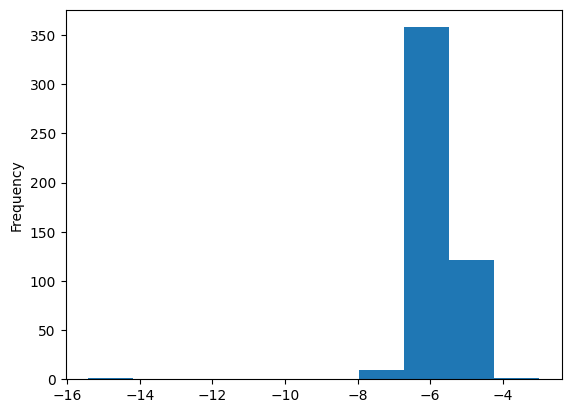

In [44]:
#Log transformation of fractal_dimension_se
log_transform_fds = np.log(filtered_df['fractal_dimension_se'])
log_transform_fds.plot.hist()
print(f'Skewness value after transformation = {log_transform_fds.skew()}')

Skewness value after transformation = 2.8325


<Axes: ylabel='Frequency'>

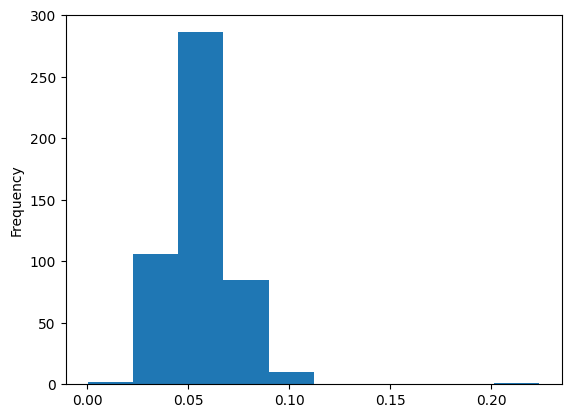

In [45]:
#Square Root transformation of fractal_dimension_se
sqrt_transform_fds = np.sqrt(filtered_df['fractal_dimension_se'])
print(f'Skewness value after transformation = {sqrt_transform_fds.skew().round(4)}')
sqrt_transform_fds.plot.hist()

Skewness value before transformation = 10.8615
Lamba value = 0.2572
Skewness value after transformation = 0.5631


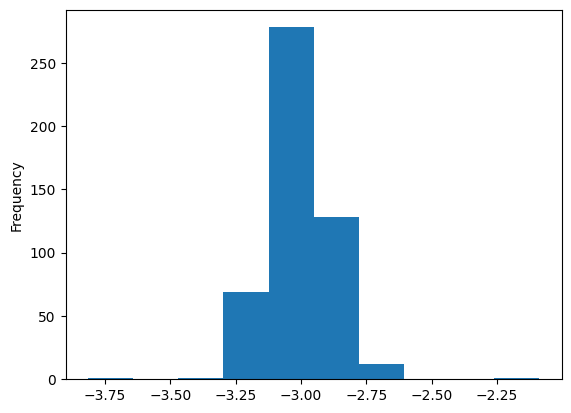

In [46]:
#Box cox transformation of fractal_dimension_se

x = filtered_df['fractal_dimension_se']
print(f'Skewness value before transformation = {x.skew().round(4)}')
boxcox_x, lambda_ =boxcox(x)
print(f'Lamba value = {lambda_.round(4)}')
boxcox_x_series = pd.Series(boxcox_x)
print(f'Skewness value after transformation = {boxcox_x_series.skew().round(4)}')
boxcox_x_series.plot.hist();

In [47]:
'''
The above results show that the Box-Cox transformation resulted in the lowest skewness value for the feature 'fractal_dimension_se'.
'''

"\nThe above results show that the Box-Cox transformation resulted in the lowest skewness value for the feature 'fractal_dimension_se'.\n"

In [48]:
#Replace original column with transformed column
filtered_df['fractal_dimension_se'] = boxcox_x

Skewness value = 0.4373


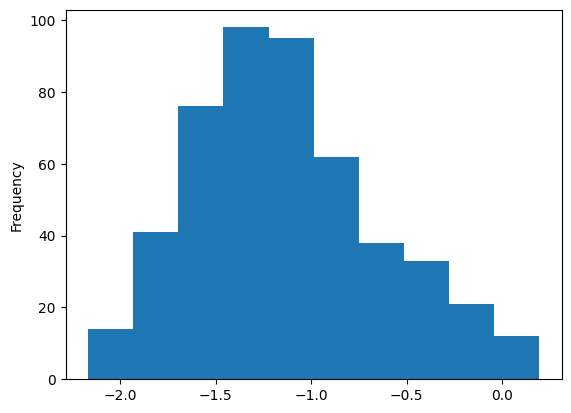

In [49]:
#Log transformation of radius_se
log_transform_fds = np.log(filtered_df['radius_se'])
log_transform_fds.plot.hist()
print(f'Skewness value = {log_transform_fds.skew().round(4)}')

Skewness value = 1.0064


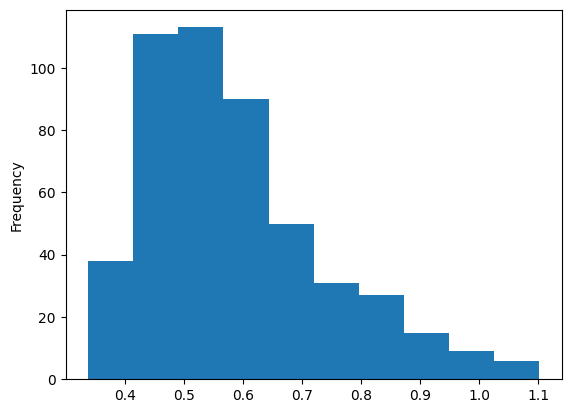

In [50]:
#Square Root transformation of radius_se
sqrt_transform_fds = np.sqrt(filtered_df['radius_se'])
print(f'Skewness value = {sqrt_transform_fds.skew().round(4)}')
sqrt_transform_fds.plot.hist();

Skewness value before transformation = 1.5883
Lamba value = -0.361
Skewness value = 0.0277


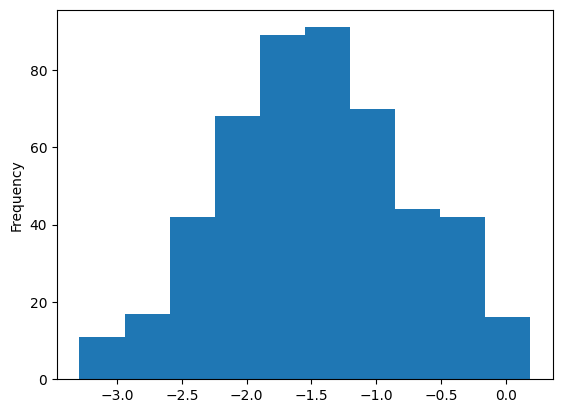

In [51]:
#Box cox transformation of radius_se

x = filtered_df['radius_se']
print(f'Skewness value before transformation = {x.skew().round(4)}')
boxcox_x, lambda_ =boxcox(x)
print(f'Lamba value = {lambda_.round(4)}')
boxcox_x_series = pd.Series(boxcox_x)
print(f'Skewness value = {boxcox_x_series.skew().round(4)}')
boxcox_x_series.plot.hist();

In [52]:
'''
The above results also shows that the Box-Cox transformation is most effecive in reducing skewness.
Therefore, the Box-Cox transformation will be applied to the remaining features to reduce the skewness.
'''

'\nThe above results also shows that the Box-Cox transformation is most effecive in reducing skewness.\nTherefore, the Box-Cox transformation will be applied to the remaining features to reduce the skewness.\n'

In [53]:
#Replace original column with transformed column
filtered_df['radius_se'] = boxcox_x

In [54]:
#Creating a variable to store the column names to transform.
columns_to_transform = filtered_df[['compactness_se', 'symmetry_se', 'smoothness_se','fractal_dimension_worst', 'compactness_mean', 
                                    'texture_se', 'radius_mean', 'symmetry_worst','fractal_dimension_mean']]

In [55]:
#Apply Box Cox transformation to remaining columns, having no zero or negative values
for column in columns_to_transform:
    transformed_values, lambda_ = boxcox(filtered_df[column])
    print(f'Column = {column}')
    print(f'Lambda value = {lambda_.round(4)}')

    transformed_series = pd.Series(transformed_values)
    print(f'Skewness value = {transformed_series.skew().round(4)}\n')

    filtered_df[column] = transformed_values

Column = compactness_se
Lambda value = 0.1321
Skewness value = -0.0052

Column = symmetry_se
Lambda value = -0.4084
Skewness value = 0.0091

Column = smoothness_se
Lambda value = -0.1962
Skewness value = 0.0052

Column = fractal_dimension_worst
Lambda value = -1.0508
Skewness value = 0.0184

Column = compactness_mean
Lambda value = 0.1543
Skewness value = -0.0117

Column = texture_se
Lambda value = 0.2188
Skewness value = -0.012

Column = radius_mean
Lambda value = -0.3243
Skewness value = 0.0029

Column = symmetry_worst
Lambda value = -0.1101
Skewness value = -0.0019

Column = fractal_dimension_mean
Lambda value = -1.5172
Skewness value = 0.0138



Skewness value before transformation = 1.0798
Lamba value = 0.1443
Skewness value = -0.0252


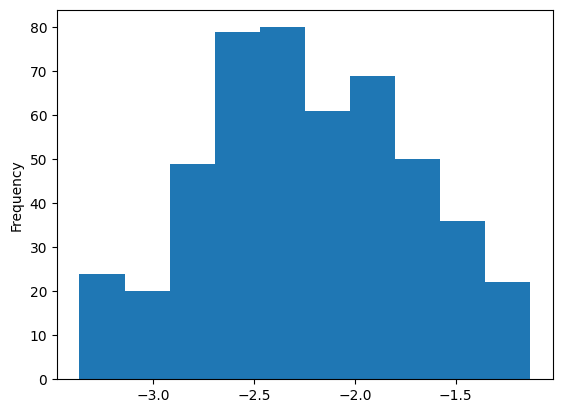

In [57]:
#Box cox transformation of concavity_mean
# Adding a constant to avoid zero values

x = filtered_df['concavity_mean'] +0.01
print(f'Skewness value before transformation = {x.skew().round(4)}')
boxcox_x, lambda_ = boxcox(x)
print(f'Lamba value = {lambda_.round(4)}')
boxcox_x_series = pd.Series(boxcox_x)
print(f'Skewness value = {boxcox_x_series.skew().round(4)}')
boxcox_x_series.plot.hist()

filtered_df['concavity_mean'] = boxcox_x

Skewness value before transformation = 0.5982
Lamba value = 0.2302
Skewness value = 0.0055


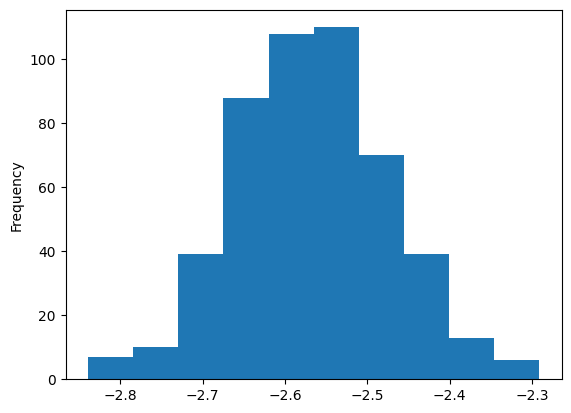

In [58]:
#Box cox transformation of concavity points_se
# Adding a constant to avoid zero values

x = filtered_df['concave points_se'] +0.01
print(f'Skewness value before transformation = {x.skew().round(4)}')
boxcox_x, lambda_ = boxcox(x)
print(f'Lamba value = {lambda_.round(4)}')
boxcox_x_series = pd.Series(boxcox_x)
print(f'Skewness value = {boxcox_x_series.skew().round(4)}')
boxcox_x_series.plot.hist()

filtered_df['concave points_se'] = boxcox_x

In [59]:
'''
Summary of the above steps:
1. Three transformation methods were applied to the features to reduce the skewness.
2. All of the three, Box-Cox transformation was most effective in reducing the skewness of the features.
3. The Box-Cox transformation was applied to the remaining features to reduce the skewness.
'''

'\nSummary of the above steps:\n1. Three transformation methods were applied to the features to reduce the skewness.\n2. All of the three, Box-Cox transformation was most effective in reducing the skewness of the features.\n3. The Box-Cox transformation was applied to the remaining features to reduce the skewness.\n'

Split Data

In [60]:
# Creating a copy of filtered dataset.
final_df = filtered_df.copy()

In [61]:
# The target variable 'diagnosis' is separated from the predictors, storing it in variable y.
# The predictors are stored in variable X.
# Splitting the dataset into training and testing datasets

X = final_df.drop(columns='diagnosis')
y = final_df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392, 18), (98, 18), (392,), (98,))

In [ ]:
'''
Summary of the above steps:
1. The target variable 'diagnosis' was separated from the predictors and stored in variable y.
2. The predictors were stored in variable X.
3. The dataset was split into training and testing datasets.
4. The training dataset will be used to train the machine learning models.
'''

Feature Scaling

In [62]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X_train, y_train)
scaled_data = pd.DataFrame(scaled_data, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_data, columns=X_test.columns)

scaled_data.head()


scaled_data = min_max_scaler.fit_transform(X_train)
scaled_X_test = min_max_scaler.transform(X_test)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,0.848887,0.557830,0.384100,0.770862,0.677295,0.641609,0.508038,0.807978,0.681046,0.632919,0.777567,0.749080,0.680862,0.754795,0.755323,0.625171,0.780157,0.754716
1,0.497723,0.438601,0.542834,0.587305,0.492240,0.597758,0.748679,0.451175,0.552818,0.685814,0.572307,0.704547,0.661855,0.715721,0.619804,0.454628,0.471799,0.570182
2,0.568070,0.438601,0.612549,0.738287,0.648000,0.668645,0.648031,0.527639,0.673829,0.651359,0.780495,0.766266,0.823198,0.809360,0.433592,0.483812,0.633397,0.579147
3,0.435851,0.160400,0.469634,0.348590,0.272584,0.601055,0.516011,0.377845,0.337869,0.728874,0.341008,0.412688,0.732362,0.567857,0.144643,0.481988,0.557578,0.322118
4,0.703124,0.438601,0.747955,0.904010,0.885684,0.593472,0.808995,0.557939,0.821139,0.758341,0.856416,0.812144,0.664740,0.820340,0.821561,0.838577,0.604397,0.824760


/Users/alibilal/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/alibilal/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/alibilal/Library/Python/3.9/lib/python/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/alibilal/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: Futur

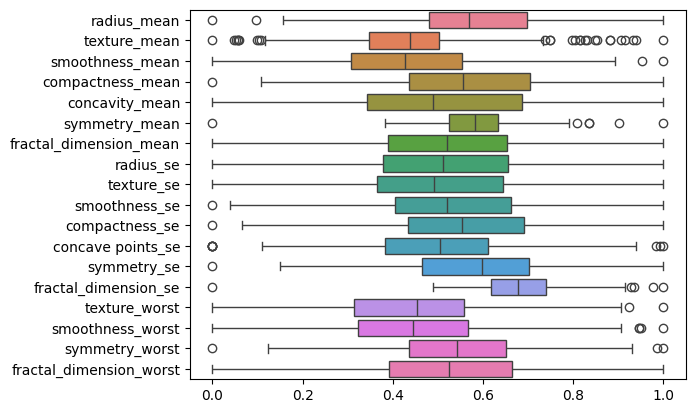

In [63]:
sns.boxplot(data=scaled_data, orient='h');

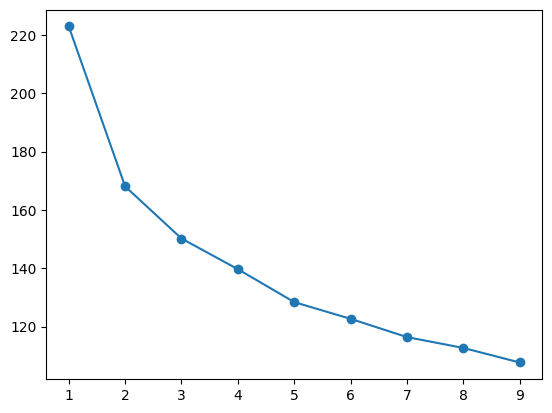

In [74]:
insertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    insertia.append(kmeans.inertia_)

plt.plot(range(1, 10), insertia, marker='o');

In [ ]:
'''
This is shwowing that the optimal number of clusters is 2.
'''

Hierarchical Clustering

In [70]:
# using final_df for clustering
X = final_df.drop(columns='diagnosis')
y = final_df['diagnosis']

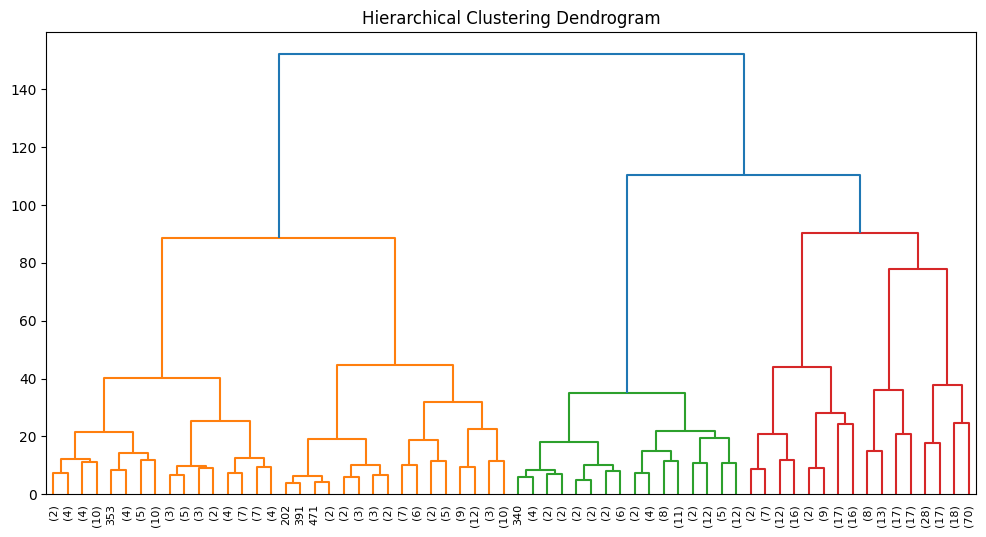

Silhouette Score: 0.2650582265263715


In [83]:
# Hierarchical clustering
linkage_criteria = 'ward'
Z = linkage(X, method=linkage_criteria)

# Visualize dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, p=5, truncate_mode='level', leaf_rotation=90., leaf_font_size=8.)
plt.show()

# Fit Agglomerative Clustering
n_clusters = 2
model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_criteria)
clusters = model.fit_predict(X)

# Compute silhouette score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")


K-Mean Clustering

In [76]:
scaled_data = scaler.fit_transform(final_df.iloc[:, 1:])

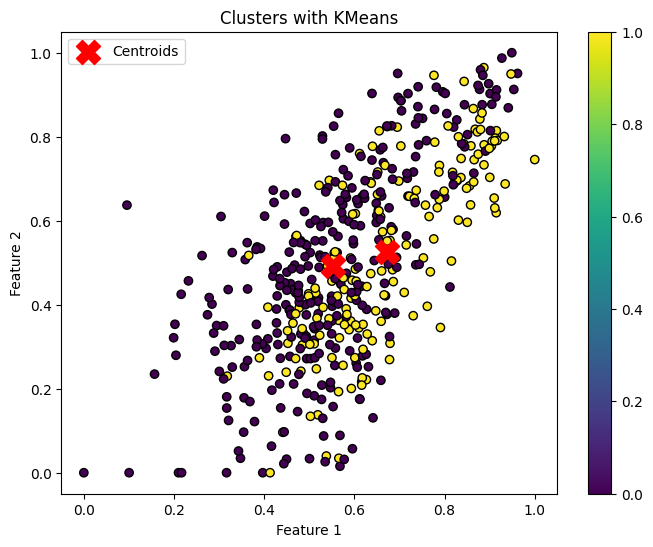

In [79]:
optimal_n_clusters = 2

# Fit the final KMeans model using the optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
final_cluster_labels = final_kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plotting the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 4], c=final_cluster_labels, cmap='viridis', edgecolors='k')

# Plotting the centroids of the clusters
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 4], s=300, c='red', marker='X', label='Centroids')

plt.title('Clusters with KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.colorbar()
plt.show()


In [82]:
# Compute silhouette score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.206707234903432


Principal Component Analysis

In [84]:
# Apply PCA to determine the explained variance ratio
pca = PCA()
pca.fit(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the number of components that explain at least 95% of the variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Number of components to retain 95% of variance:", n_components_95)

Number of components to retain 95% of variance: 9


In [85]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=9)
pca.fit(scaled_data)
scaled_data_pca = pca.transform(scaled_data)

Shape of transformed data after PCA: (490, 9)


In [ ]:
# Store the transformed data in a new variable
# Now scaled_data_pca contains the data with reduced dimensions
# You can use it for further analysis or visualization
print("Shape of transformed data after PCA:", scaled_data_pca.shape)

In [86]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data_pca)

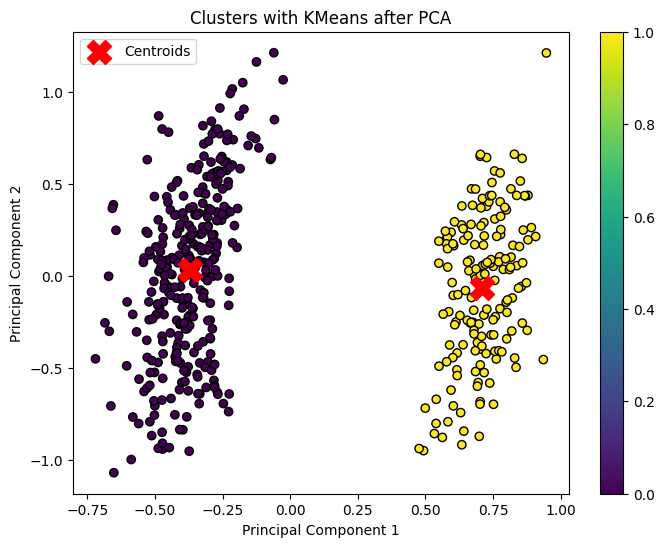

In [112]:
# Fit the final KMeans model using the optimal number of clusters on PCA-transformed data
final_kmeans_pca = KMeans(n_clusters=optimal_n_clusters, random_state=42)
final_cluster_labels_pca = final_kmeans_pca.fit_predict(scaled_data_pca)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plotting the clusters
plt.scatter(scaled_data_pca[:, 0], scaled_data_pca[:, 1], c=final_cluster_labels_pca, cmap='viridis', edgecolors='k')

# Plotting the centroids of the clusters
plt.scatter(final_kmeans_pca.cluster_centers_[:, 0], final_kmeans_pca.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')

plt.title('Clusters with KMeans after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar()
plt.show()

In [87]:
# Compute silhouette score
silhouette_avg = silhouette_score(scaled_data_pca, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3547211590104527


Logistic Regression

In [90]:
# Scale the data
scaled_data = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [92]:
# Fit the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(scaled_data, y_train)

LogisticRegression(max_iter=1000)

In [93]:
scaled_data.shape

(392, 18)

In [94]:
# Test the model
y_test.iloc[0]

1.0

In [95]:
# Test the model
y_test.iloc[44]

0.0

In [96]:
# Apply the model to the test data
y_pred = logistic_model.predict(scaled_X_test)

In [97]:
y_pred[0]

1.0

In [98]:
y_pred[44]

0.0

In [110]:
#Evaluate the model
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Precison Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Confusion Matrix:
 [[29  4]
 [ 1 64]]
Accuracy Score: 0.9489795918367347
Precison Score: 0.9411764705882353
Recall Score: 0.9846153846153847
F1 Score: 0.9624060150375939


In [ ]:
'''
The logistic regression model's performance can be summarized as follows:

Confusion Matrix: The confusion matrix indicates that there are 29 true negatives (TN), 4 false positives (FP), 
    1 false negative (FN), and 64 true positives (TP).
Accuracy Score: The accuracy score of 0.949 suggests that the model correctly predicts 94.9% of the samples.
Precision Score: With a precision score of 0.941, the model accurately predicts 94.1% of the positive cases among all predicted positive cases.
Recall Score: The recall score of 0.985 indicates that the model identifies 98.5% of the actual positive cases.
F1 Score: The F1 score, which is the harmonic mean of precision and recall, is 0.962. 
    It represents the balance between precision and recall, where higher values indicate better model performance.

Overall, the logistic regression model demonstrates strong predictive capability with high accuracy, precision, recall, and F1 score, 
    suggesting it effectively distinguishes between the two classes.
'''

In [ ]:
'''
PROJECT REPORT

**Title: Breast Cancer Dataset Analysis Using Machine Learning Models**

**1. Introduction:**
Breast cancer is a significant health concern globally, and the application of machine learning techniques can aid in early detection. 
This project focuses on analysis of a breast cancer dataset using preprocessing, different machine learning methods to gain insights and 
to predict outcomes.

**2. Dataset Description:**
The dataset comprises of features of breast cancer masses, including 33 attributes such as radius, texture, perimeter, area, smoothness, 
compactness, concavity, concave points, symmetry, and fractal dimension. and 570 observations. It contains instances of both malignant and 
benign tumors obtained from medical examinations, which are represented as 'M' and 'B' in target feature named 'diagnosis'.

**3. Preprocessing:**
- Missing Value Handling: The missing values were replaced by median values techniques since the data is not normally distributed.
       There were -999.0 values found in the dataset, which also considered as missing values and treated in the same way.
       The median was calculated after replacing -999.0 to nan values, otherwise the median value may not be calculated accurately.
- Duplicate Value Handing: There were two duplicate values found, that were removed before further analysis.
- Outlier Handing: The outliers were handled using IQR method, which considers any value outlier if it is 3 standard 
        deviations away from the mean of the feature.
- Feature Encoding: The target feature 'diagnosis' was encoded into binary values using One Hot Encoding method.
- Feature Transformation:
    Initially, following 3 transformation methods were applied to 2 features and compare the results. It is evident that Box-Cox 
    transformation method shows skewness nearest to 0. Therefore, Box Cox transformation was applied to rest of the features.
    The features which has skewness below -0.5 and above 0.5 was selected for skewness.


- Feature Scaling: Features were standardized to bring them to a comparable scale, ensuring that no particular feature dominated due to 
    its magnitude.
- Encoding: Categorical variables, if any, were encoded using methods like one-hot encoding.

**4. Clustering:**
- Determination of Clusters: We used techniques like the elbow method to identify the optimal number of clusters, which is 2.
- Evaluation: Silhouette score is used to assess the quality of clustering.

- Two type of Clustering applied to assess which one shows better results:
- Hierarchical Clustering: It starts by considering each data point as a separate cluster and iteratively merges or splits clusters 
    based on their proximity until a hierarchy of clusters is formed. 
    Dendrogram is used to illustrate the relationships between clusters.
    The Silhouette score of Hierarchical Clustering is 0.2650, which is quite low.
- K-means Clustering: The K-means algorithm was applied to same data set, which do grouping of similar instances together based on
    their feature similarity.
    The Silhouette score of K-Mean Clustering is 0.2067, which also considered as low.
- Principal Component Analysis: This techique is used to create prinpical component from variable, to improve the clustering model.
    It suggested 9 principal component, and K-Mean clustering again applied on the output from PCA.
    The Silhouette score improved to 0.3547.

- Evaluation: Silhouette score is used to assess the quality of different clustering techniques and PCA application.

**5. Logistic Regression Analysis:**
- Data Splitting: The dataset was divided into training and testing sets to train and evaluate the logistic regression model.
- Model Training: Logistic regression was trained on the training data using gradient descent.
- Model Evaluation: Performance metrics scores are as follows:
    accuracy: 0.9489, precision: 0.9411, recall score: 0.9846 and F1-score: 0.9624. These scores explains that model correctly predicts 
    94.9% of the samples, F1 score is the harmonic mean of precision and recall, showing high model performance

**6. Conclusion:**
This project demonstrates the application of machine learning techniques in breast cancer analysis. For clustering, K-Mean clustering in 
combination of PCA shows higher performance. Whereas, Logistic Regression also showed accuracy, precision and F1 score above 0.90, which means 
the model is working at high performance.

**7. Future Work:**
Future work may involve refining feature selection techniques, applying hyper tuning on mentioned above machine learning models to imporve 
their performance and exploring additional ML algorithms.
'''